In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
import seaborn as sns


# Caption length in 8k

                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  


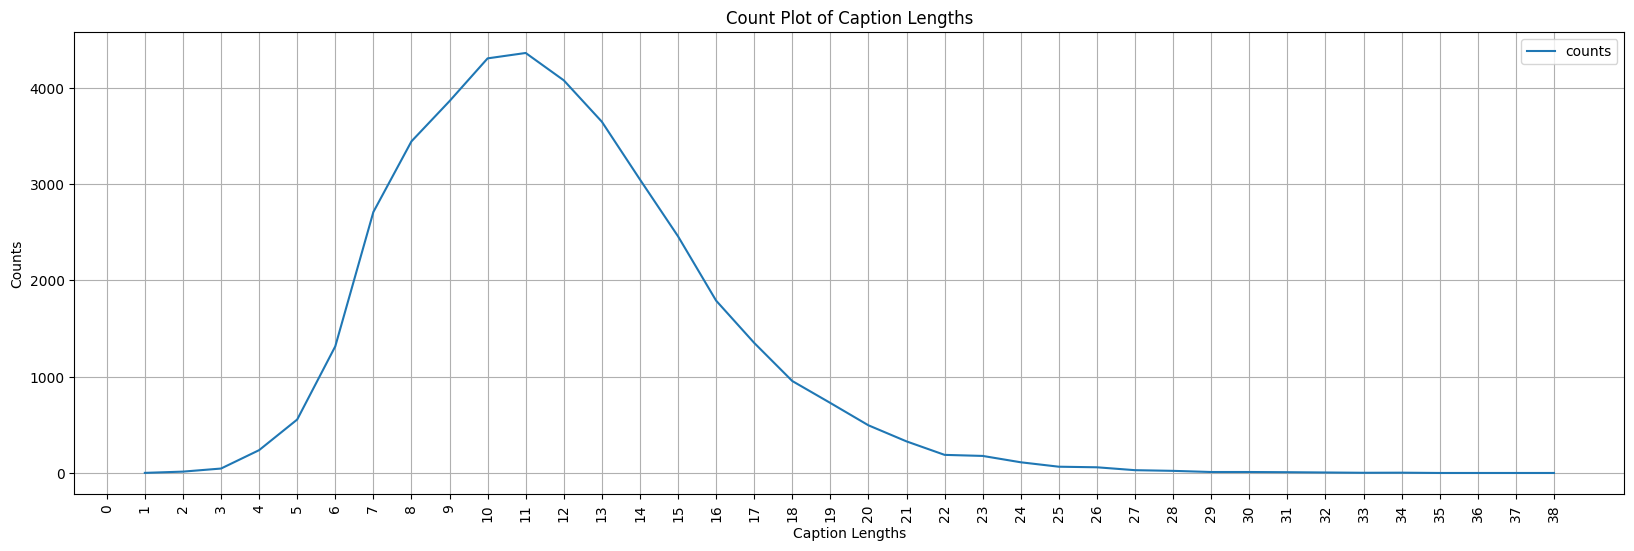

In [2]:

captions_df = pd.read_csv('/kaggle/input/flickr8k/captions.txt')

print(captions_df.head())

captions_df['caption_length'] = captions_df['caption'].apply(lambda x: len(x.split()))

length_counts = captions_df['caption_length'].value_counts().sort_index()
df_counts = pd.DataFrame({'Values': length_counts.index, 'counts': length_counts.values})

df_counts.set_index('Values').plot(grid=True, figsize=(20, 6))
plt.title("Count Plot of Caption Lengths")
plt.xlabel("Caption Lengths")
plt.xticks(np.arange(0, df_counts['Values'].max() + 1, 1), rotation=90)
plt.ylabel("Counts")
plt.show()


# Top 10 common words in 8k

Total unique words in captions: 9630


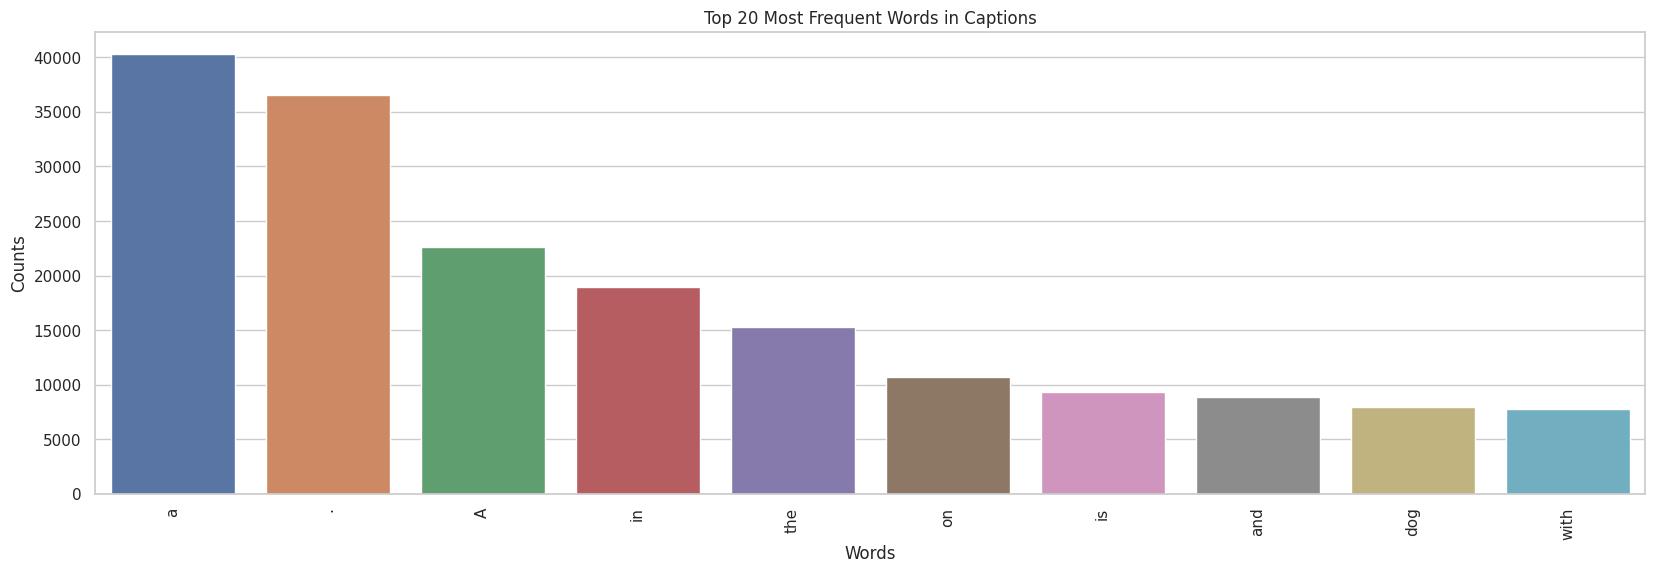

In [3]:
captions_df = pd.read_csv('/kaggle/input/flickr8k/captions.txt')

all_words = []
for caption in captions_df['caption']:
    all_words.extend(caption.split())

word_counts = Counter(all_words)

unique_word_count = len(word_counts)
print(f"Total unique words in captions: {unique_word_count}")

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

sns.set(style='whitegrid')
plt.figure(figsize=(20, 6))
sns.barplot(x='word', y='count', data=word_counts_df[:10])  
plt.xticks(rotation='vertical')
plt.title("Top 20 Most Frequent Words in Captions")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()


# Top 10 least frequent words in 8k

Processing captions for Flickr8k...

Sample of captions:
                       image  \
0  1000268201_693b08cb0e.jpg   
1  1000268201_693b08cb0e.jpg   
2  1000268201_693b08cb0e.jpg   
3  1000268201_693b08cb0e.jpg   
4  1000268201_693b08cb0e.jpg   

                                             caption  
0  A child in a pink dress is climbing up a set o...  
1              A girl going into a wooden building .  
2   A little girl climbing into a wooden playhouse .  
3  A little girl climbing the stairs to her playh...  
4  A little girl in a pink dress going into a woo...  


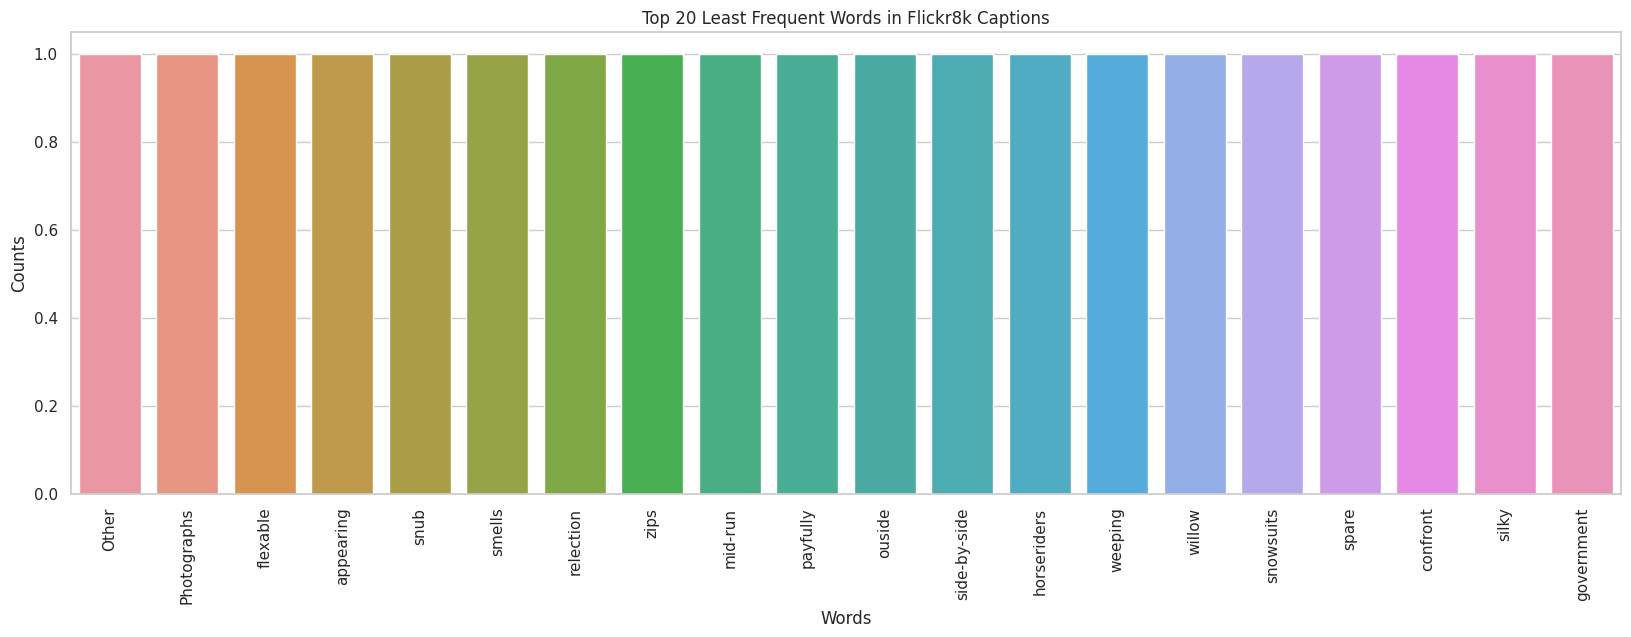


Top 5 Least Frequent Words in Flickr8k:
             word  count
4170        Other      1
4171  Photographs      1
4173     flexable      1
4174    appearing      1
4114         snub      1


In [4]:

flickr8k_path = '/kaggle/input/flickr8k/captions.txt'

def process_flickr8k(caption_path):
    captions_df = pd.read_csv(caption_path)
    print(f"Processing captions for Flickr8k...\n")
    print("Sample of captions:")
    print(captions_df.head())  

   
    all_words = []
    for caption in captions_df['caption']:
        all_words.extend(caption.split())

    word_counts = Counter(all_words)

    least_frequent_words_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=True)

    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.barplot(x='word', y='count', data=least_frequent_words_df[:20]) 
    plt.xticks(rotation='vertical')
    plt.title("Top 20 Least Frequent Words in Flickr8k Captions")
    plt.xlabel("Words")
    plt.ylabel("Counts")
    plt.show()

    print(f"\nTop 5 Least Frequent Words in Flickr8k:")
    print(least_frequent_words_df[:5])

process_flickr8k(flickr8k_path)


# The average caption length for Flickr8k

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


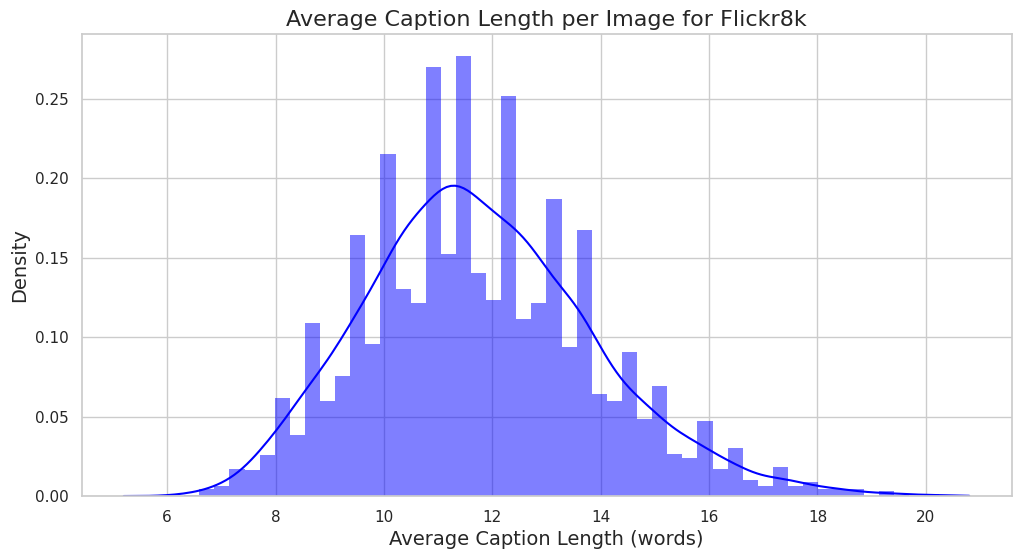

In [5]:
flickr8k_path = '/kaggle/input/flickr8k/captions.txt'
captions_df_8k = pd.read_csv(flickr8k_path)

captions_df_8k['caption'] = captions_df_8k['caption'].fillna('')

captions_df_8k['caption_length'] = captions_df_8k['caption'].apply(lambda x: len(x.split()))

avg_caption_length_8k = captions_df_8k.groupby('image')['caption_length'].mean()

plt.figure(figsize=(12, 6))
sns.histplot(avg_caption_length_8k, kde=True, color='blue', stat="density", linewidth=0)
plt.title("Average Caption Length per Image for Flickr8k", fontsize=16)
plt.xlabel("Average Caption Length (words)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()


# Flickr30k Dataset

# The distribution of caption lengths 30k

            image                                            caption
0  1000092795.jpg   Two young guys with shaggy hair look at their...
1  1000092795.jpg   Two young , White males are outside near many...
2  1000092795.jpg   Two men in green shirts are standing in a yard .
3  1000092795.jpg       A man in a blue shirt standing in a garden .
4  1000092795.jpg            Two friends enjoy time spent together .


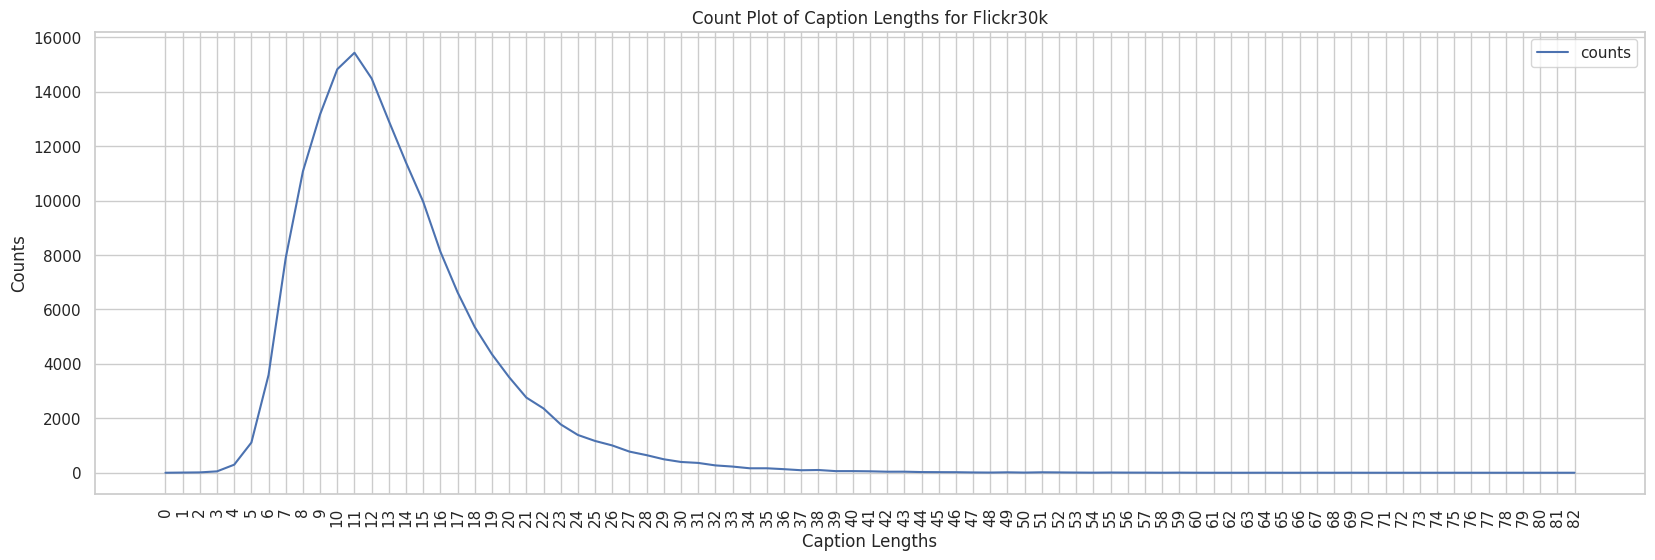

In [6]:
captions_df = pd.read_csv('/kaggle/input/flickr30k/captions.txt')  
print(captions_df.head())

captions_df['caption'] = captions_df['caption'].fillna('')  

captions_df['caption_length'] = captions_df['caption'].apply(lambda x: len(x.split()))

length_counts = captions_df['caption_length'].value_counts().sort_index()
df_counts = pd.DataFrame({'Values': length_counts.index, 'counts': length_counts.values})

df_counts.set_index('Values').plot(grid=True, figsize=(20, 6))
plt.title("Count Plot of Caption Lengths for Flickr30k") 
plt.xlabel("Caption Lengths")
plt.xticks(np.arange(0, df_counts['Values'].max() + 1, 1), rotation=90)
plt.ylabel("Counts")
plt.show()


# Most frequest words in 30k

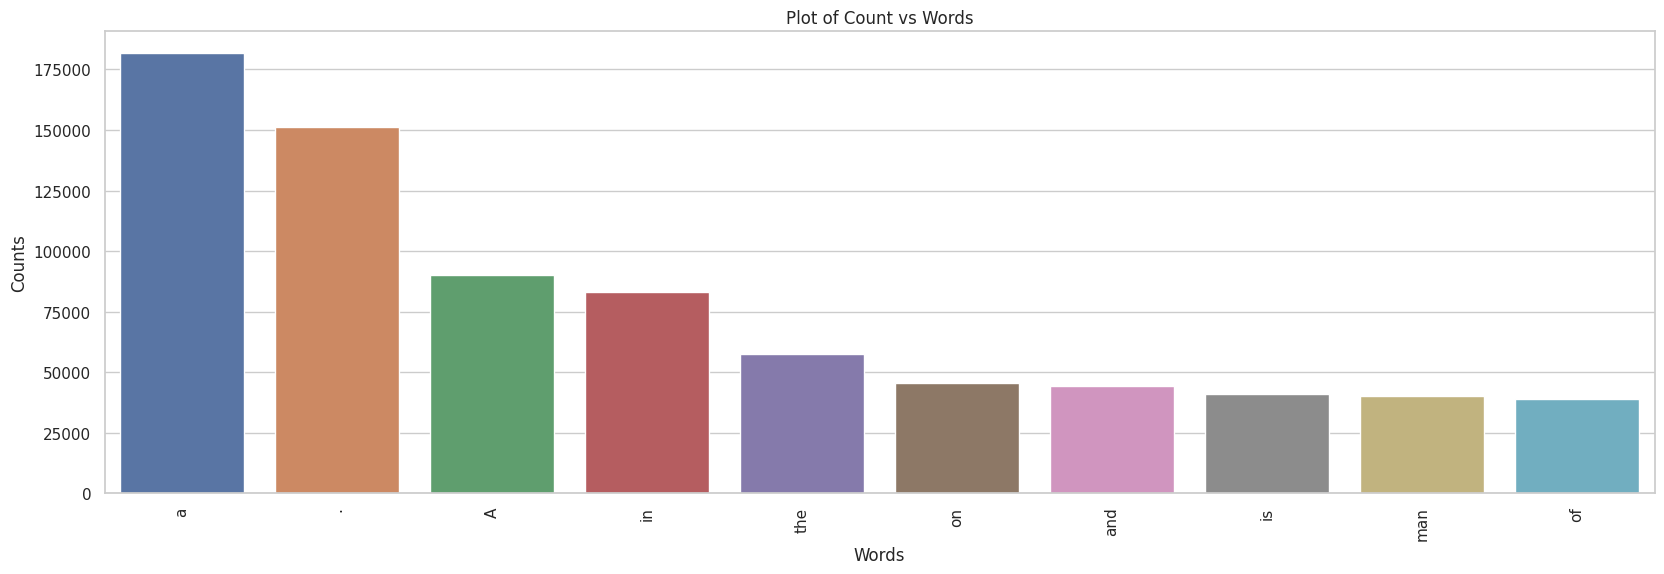

In [7]:
captions_df = pd.read_csv('/kaggle/input/flickr30k/captions.txt')

captions_df['caption'] = captions_df['caption'].fillna('')

all_words = []
for caption in captions_df['caption']:
    all_words.extend(caption.split())

from collections import Counter
word_counts = Counter(all_words)

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
plt.figure(figsize=(20, 6))
sns.barplot(x='word', y='count', data=word_counts_df[:10]) 
plt.xticks(rotation='vertical')
plt.title("Plot of Count vs Words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.show()


# Lest frequent words in 30k dataset

Processing captions for Flickr30k...

Sample of captions:
            image                                            caption
0  1000092795.jpg   Two young guys with shaggy hair look at their...
1  1000092795.jpg   Two young , White males are outside near many...
2  1000092795.jpg   Two men in green shirts are standing in a yard .
3  1000092795.jpg       A man in a blue shirt standing in a garden .
4  1000092795.jpg            Two friends enjoy time spent together .


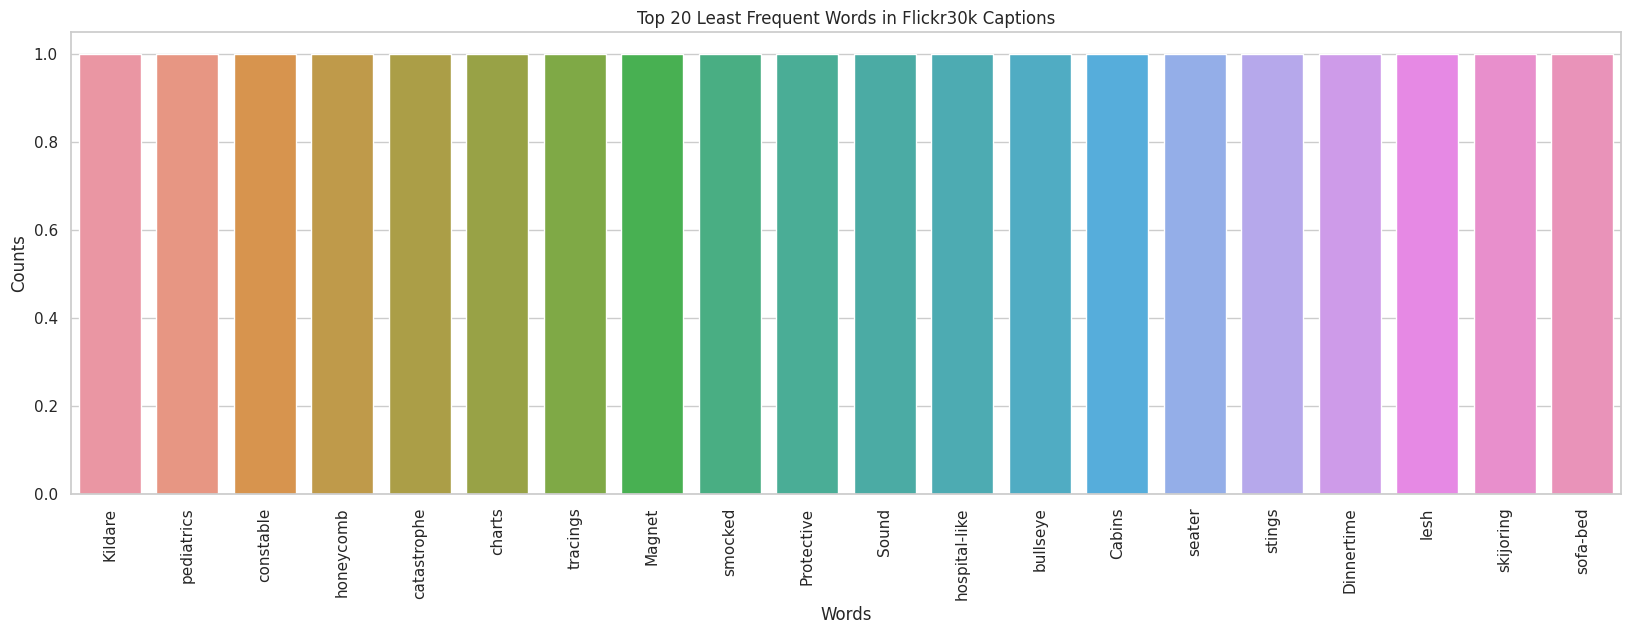


Top 5 Least Frequent Words in Flickr30k:
              word  count
8827       Kildare      1
16971   pediatrics      1
16973    constable      1
16975    honeycomb      1
16960  catastrophe      1


In [8]:

flickr30k_path = '/kaggle/input/flickr30k/captions.txt'

def process_flickr30k(caption_path):
    captions_df = pd.read_csv(caption_path)
    print(f"Processing captions for Flickr30k...\n")
    print("Sample of captions:")
    print(captions_df.head())  

    all_words = []
    
    for caption in captions_df['caption'].dropna():
        caption = str(caption)  
        all_words.extend(caption.split())

    word_counts = Counter(all_words)

    least_frequent_words_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=True)

    sns.set(style='whitegrid')
    plt.figure(figsize=(20, 6))
    sns.barplot(x='word', y='count', data=least_frequent_words_df[:20])
    plt.xticks(rotation='vertical')
    plt.title("Top 20 Least Frequent Words in Flickr30k Captions")
    plt.xlabel("Words")
    plt.ylabel("Counts")
    plt.show()

    print(f"\nTop 5 Least Frequent Words in Flickr30k:")
    print(least_frequent_words_df[:5])

process_flickr30k(flickr30k_path)


# The average caption length for Flickr30k

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


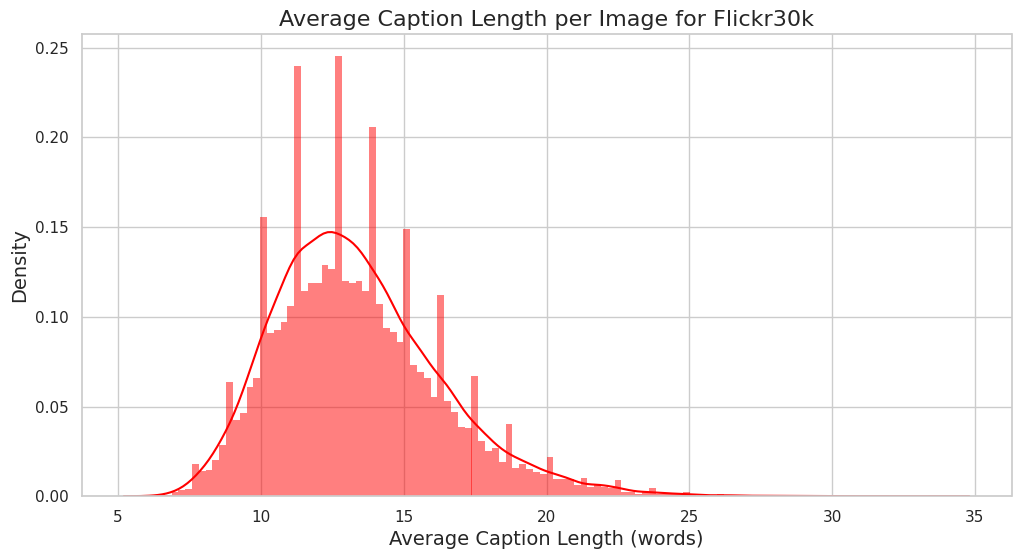

In [9]:
flickr30k_path = '/kaggle/input/flickr30k/captions.txt'
captions_df_30k = pd.read_csv(flickr30k_path)

captions_df_30k['caption'] = captions_df_30k['caption'].fillna('')

captions_df_30k['caption_length'] = captions_df_30k['caption'].apply(lambda x: len(x.split()))

avg_caption_length_30k = captions_df_30k.groupby('image')['caption_length'].mean()


plt.figure(figsize=(12, 6))
sns.histplot(avg_caption_length_30k, kde=True, color='red', stat="density", linewidth=0)
plt.title("Average Caption Length per Image for Flickr30k", fontsize=16)
plt.xlabel("Average Caption Length (words)", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()


# BLEU Score 8k

In [10]:
folder_path = '/kaggle/input/mymodelsbleu/'

vgg16_path = os.path.join(folder_path, 'vgg16_bleu_scores.pkl')
resnet50_path = os.path.join(folder_path, 'fresnet50_bleu_scores.pkl')
mobilenetv3_path = os.path.join(folder_path, 'mobilenetv3_bleu_scores.pkl')



In [11]:
def load_pkl(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

vgg16_bleu_scores = load_pkl(vgg16_path)
resnet50_bleu_scores = load_pkl(resnet50_path)
mobilenetv3_bleu_scores = load_pkl(mobilenetv3_path)



In [12]:
bleu_keys = ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4']

vgg16_bleu_values = [round(vgg16_bleu_scores[key], 3) for key in bleu_keys]
resnet50_bleu_values = [round(resnet50_bleu_scores[key], 3) for key in bleu_keys]
mobilenetv3_bleu_values = [round(mobilenetv3_bleu_scores[key], 3) for key in bleu_keys]

print(f"{'Model':<15} {'BLEU-1':<10} {'BLEU-2':<10} {'BLEU-3':<10} {'BLEU-4':<10}")
print("="*55)

print(f"VGG16         {vgg16_bleu_values[0]:<10} {vgg16_bleu_values[1]:<10} {vgg16_bleu_values[2]:<10} {vgg16_bleu_values[3]:<10}")
print(f"ResNet50      {resnet50_bleu_values[0]:<10} {resnet50_bleu_values[1]:<10} {resnet50_bleu_values[2]:<10} {resnet50_bleu_values[3]:<10}")
print(f"MobileNetV3   {mobilenetv3_bleu_values[0]:<10} {mobilenetv3_bleu_values[1]:<10} {mobilenetv3_bleu_values[2]:<10} {mobilenetv3_bleu_values[3]:<10}")


Model           BLEU-1     BLEU-2     BLEU-3     BLEU-4    
VGG16         0.548      0.321      0.202      0.12      
ResNet50      0.542      0.318      0.201      0.122     
MobileNetV3   0.5        0.273      0.162      0.091     


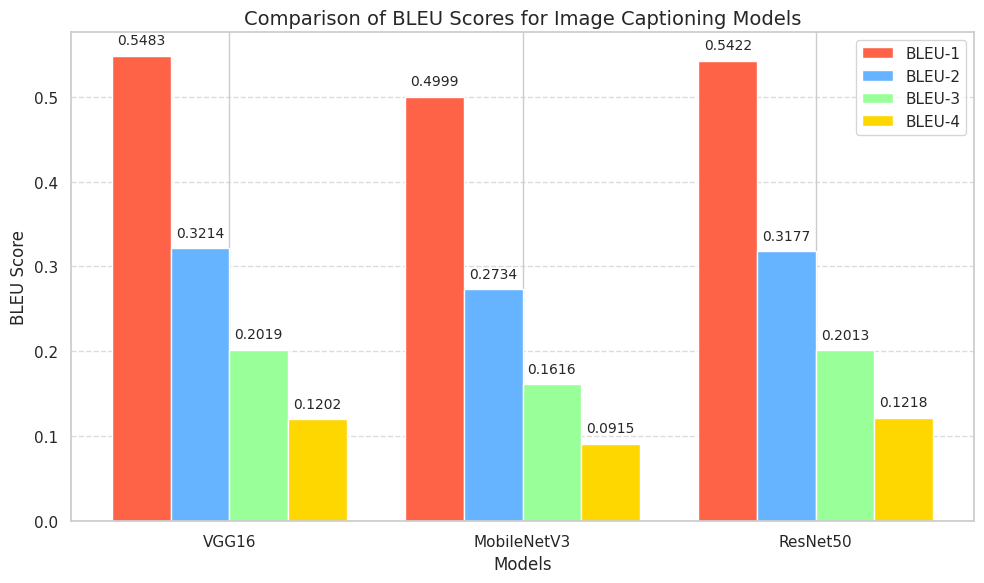

In [13]:


models = ['VGG16', 'MobileNetV3', 'ResNet50']
bleu_1 = [vgg16_bleu_scores['BLEU-1'], mobilenetv3_bleu_scores['BLEU-1'], resnet50_bleu_scores['BLEU-1']]
bleu_2 = [vgg16_bleu_scores['BLEU-2'], mobilenetv3_bleu_scores['BLEU-2'], resnet50_bleu_scores['BLEU-2']]
bleu_3 = [vgg16_bleu_scores['BLEU-3'], mobilenetv3_bleu_scores['BLEU-3'], resnet50_bleu_scores['BLEU-3']]
bleu_4 = [vgg16_bleu_scores['BLEU-4'], mobilenetv3_bleu_scores['BLEU-4'], resnet50_bleu_scores['BLEU-4']]

bar_width = 0.2
index = np.arange(len(models))

colors = ['#FF6347', '#66B3FF', '#99FF99', '#FFD700']

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(index - 1.5 * bar_width, bleu_1, bar_width, label='BLEU-1', color=colors[0])
bars2 = ax.bar(index - 0.5 * bar_width, bleu_2, bar_width, label='BLEU-2', color=colors[1])
bars3 = ax.bar(index + 0.5 * bar_width, bleu_3, bar_width, label='BLEU-3', color=colors[2])
bars4 = ax.bar(index + 1.5 * bar_width, bleu_4, bar_width, label='BLEU-4', color=colors[3])

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('BLEU Score', fontsize=12)
ax.set_title('Comparison of BLEU Scores for Image Captioning Models', fontsize=14)

ax.set_xticks(index)
ax.set_xticklabels(models)

ax.legend()

ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


VGG16 BLEU Scores: {'BLEU-1': 0.5482977724712511, 'BLEU-2': 0.3214099758073635, 'BLEU-3': 0.20193224370760124, 'BLEU-4': 0.12020025843987495}
MobileNetV3 BLEU Scores: {'BLEU-1': 0.4999460218071899, 'BLEU-2': 0.2734196109183099, 'BLEU-3': 0.16156539859524663, 'BLEU-4': 0.09149689634907257}
ResNet50 BLEU Scores: {'BLEU-1': 0.5422227083789105, 'BLEU-2': 0.31770212467952896, 'BLEU-3': 0.20129232035635194, 'BLEU-4': 0.12177882561072026}

The best model based on the average BLEU score is: VGG16+LSTM with an average score of 0.2980


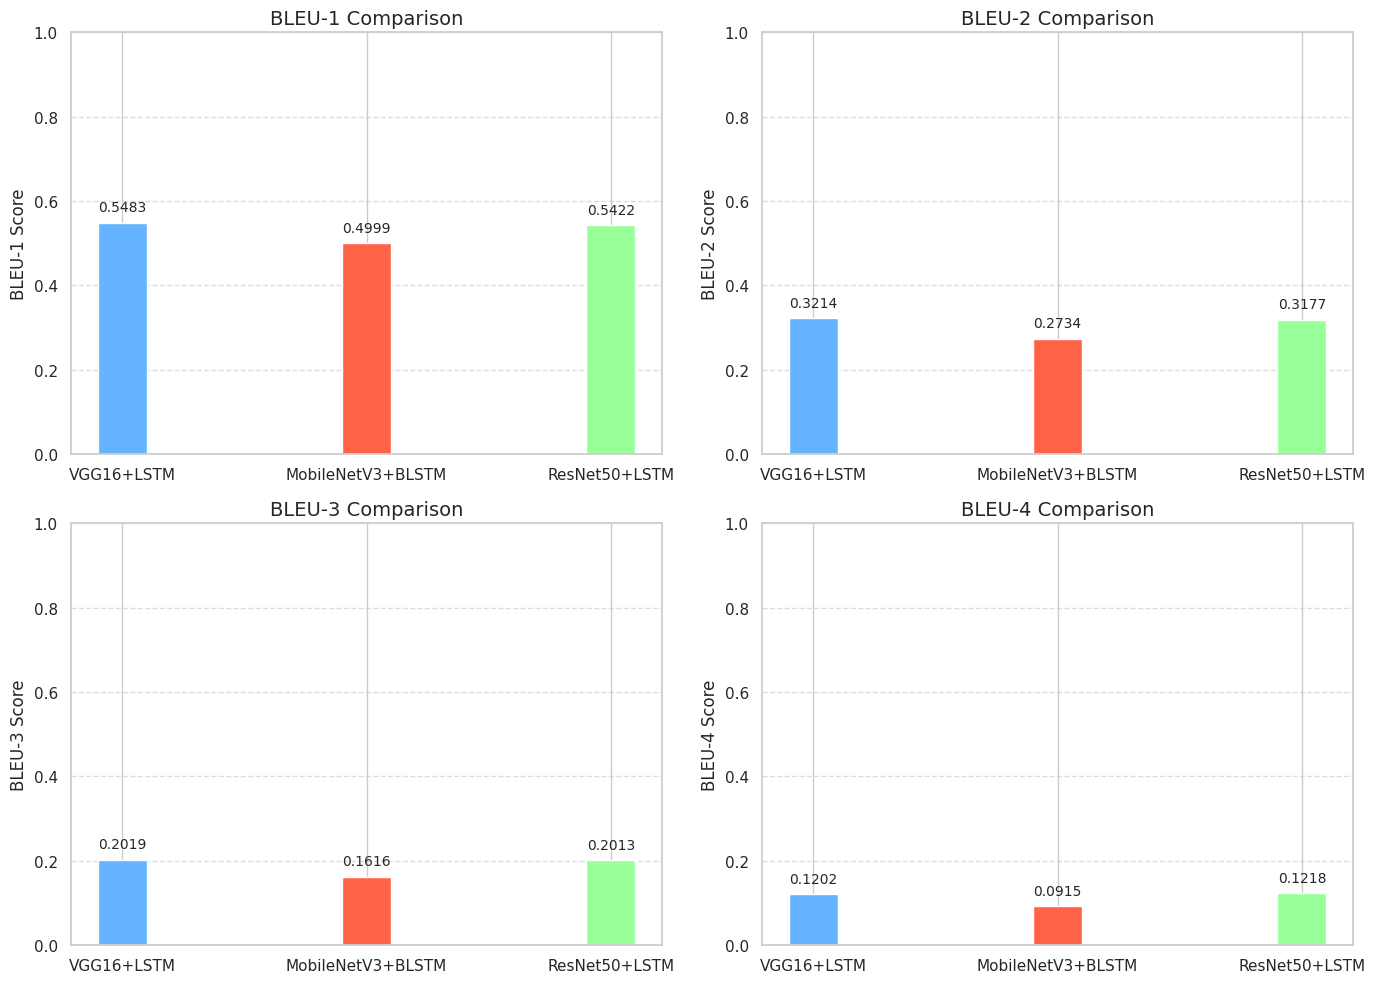

In [14]:

with open('/kaggle/input/mymodelsbleu/vgg16_bleu_scores.pkl', 'rb') as f:
    vgg_bleu_scores = pickle.load(f)

with open('/kaggle/input/mymodelsbleu/mobilenetv3_bleu_scores.pkl', 'rb') as f:
    mobilenet_bleu_scores = pickle.load(f)

with open('/kaggle/input/mymodelsbleu/fresnet50_bleu_scores.pkl', 'rb') as f:
    resnet_bleu_scores = pickle.load(f)

print("VGG16 BLEU Scores:", vgg_bleu_scores)
print("MobileNetV3 BLEU Scores:", mobilenet_bleu_scores)
print("ResNet50 BLEU Scores:", resnet_bleu_scores)

models = ['VGG16+LSTM', 'MobileNetV3+BLSTM', 'ResNet50+LSTM']

bleu_1 = [
    vgg_bleu_scores['BLEU-1'],
    mobilenet_bleu_scores['BLEU-1'],
    resnet_bleu_scores['BLEU-1']
]

bleu_2 = [
    vgg_bleu_scores['BLEU-2'],
    mobilenet_bleu_scores['BLEU-2'],
    resnet_bleu_scores['BLEU-2']
]

bleu_3 = [
    vgg_bleu_scores['BLEU-3'],
    mobilenet_bleu_scores['BLEU-3'],
    resnet_bleu_scores['BLEU-3']
]

bleu_4 = [
    vgg_bleu_scores['BLEU-4'],
    mobilenet_bleu_scores['BLEU-4'],
    resnet_bleu_scores['BLEU-4']
]

model_colors = ['#66B3FF', '#FF6347', '#99FF99']  

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

bar_width = 0.2
index = np.arange(len(models))

# BLEU-1 
axes[0, 0].bar(index, bleu_1, bar_width, color=model_colors)
axes[0, 0].set_title('BLEU-1 Comparison', fontsize=14)
axes[0, 0].set_xticks(index)
axes[0, 0].set_xticklabels(models)
axes[0, 0].set_ylabel('BLEU-1 Score')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_1):
    axes[0, 0].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

# BLEU-2 
axes[0, 1].bar(index, bleu_2, bar_width, color=model_colors)
axes[0, 1].set_title('BLEU-2 Comparison', fontsize=14)
axes[0, 1].set_xticks(index)
axes[0, 1].set_xticklabels(models)
axes[0, 1].set_ylabel('BLEU-2 Score')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_2):
    axes[0, 1].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

# BLEU-3 
axes[1, 0].bar(index, bleu_3, bar_width, color=model_colors)
axes[1, 0].set_title('BLEU-3 Comparison', fontsize=14)
axes[1, 0].set_xticks(index)
axes[1, 0].set_xticklabels(models)
axes[1, 0].set_ylabel('BLEU-3 Score')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_3):
    axes[1, 0].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

# BLEU-4 
axes[1, 1].bar(index, bleu_4, bar_width, color=model_colors)
axes[1, 1].set_title('BLEU-4 Comparison', fontsize=14)
axes[1, 1].set_xticks(index)
axes[1, 1].set_xticklabels(models)
axes[1, 1].set_ylabel('BLEU-4 Score')
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_4):
    axes[1, 1].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

avg_bleu_scores = np.mean([bleu_1, bleu_2, bleu_3, bleu_4], axis=0)

best_model_idx = np.argmax(avg_bleu_scores)
best_model = models[best_model_idx]
print(f"\nThe best model based on the average BLEU score is: {best_model} with an average score of {avg_bleu_scores[best_model_idx]:.4f}")

plt.show()


# BLUE Score Comparison for 30k

In [15]:
folder_path = '/kaggle/input/mymodelsbleu30k/'

vgg16_path30 = os.path.join(folder_path, 'vgg16_bleu_scoresF.pkl')
resnet50_path30 = os.path.join(folder_path, 'resnet50_bleu_scoresf.pkl')
mobilenetv3_path30 = os.path.join(folder_path, 'mobilenetv3_bleu_scoresf.pkl')



In [16]:
def load_pkl(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

vgg16_bleu_scores30 = load_pkl(vgg16_path30)
resnet50_bleu_scores30 = load_pkl(resnet50_path30)
mobilenetv3_bleu_scores30 = load_pkl(mobilenetv3_path30)


In [17]:
bleu_keys30 = ['BLEU-1', 'BLEU-2', 'BLEU-3', 'BLEU-4']

vgg16_bleu_values30 = [round(vgg16_bleu_scores30[key], 3) for key in bleu_keys30]
resnet50_bleu_values30 = [round(resnet50_bleu_scores30[key], 3) for key in bleu_keys30]
mobilenetv3_bleu_values30 = [round(mobilenetv3_bleu_scores30[key], 3) for key in bleu_keys30]

print(f"{'Model':<15} {'BLEU-1':<10} {'BLEU-2':<10} {'BLEU-3':<10} {'BLEU-4':<10}")
print("="*55)

print(f"VGG16         {vgg16_bleu_values30[0]:<10} {vgg16_bleu_values30[1]:<10} {vgg16_bleu_values30[2]:<10} {vgg16_bleu_values30[3]:<10}")
print(f"ResNet50      {resnet50_bleu_values30[0]:<10} {resnet50_bleu_values30[1]:<10} {resnet50_bleu_values30[2]:<10} {resnet50_bleu_values30[3]:<10}")
print(f"MobileNetV3   {mobilenetv3_bleu_values30[0]:<10} {mobilenetv3_bleu_values30[1]:<10} {mobilenetv3_bleu_values30[2]:<10} {mobilenetv3_bleu_values30[3]:<10}")


Model           BLEU-1     BLEU-2     BLEU-3     BLEU-4    
VGG16         0.536      0.287      0.166      0.09      
ResNet50      0.535      0.293      0.173      0.096     
MobileNetV3   0.478      0.238      0.131      0.069     


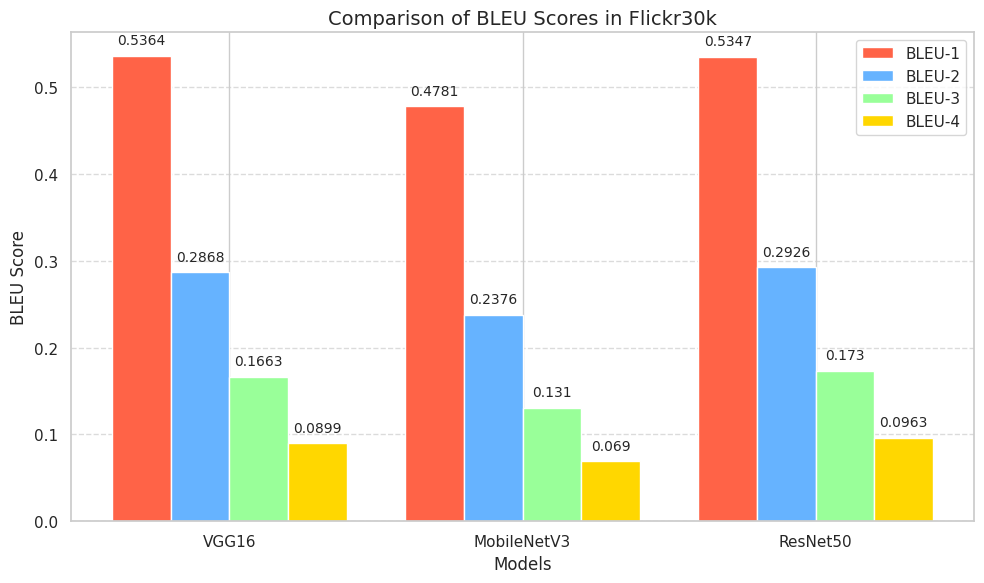

In [18]:

models = ['VGG16', 'MobileNetV3', 'ResNet50']
bleu_1 = [vgg16_bleu_scores30['BLEU-1'], mobilenetv3_bleu_scores30['BLEU-1'], resnet50_bleu_scores30['BLEU-1']]
bleu_2 = [vgg16_bleu_scores30['BLEU-2'], mobilenetv3_bleu_scores30['BLEU-2'], resnet50_bleu_scores30['BLEU-2']]
bleu_3 = [vgg16_bleu_scores30['BLEU-3'], mobilenetv3_bleu_scores30['BLEU-3'], resnet50_bleu_scores30['BLEU-3']]
bleu_4 = [vgg16_bleu_scores30['BLEU-4'], mobilenetv3_bleu_scores30['BLEU-4'], resnet50_bleu_scores30['BLEU-4']]

bar_width = 0.2
index = np.arange(len(models))

colors = ['#FF6347', '#66B3FF', '#99FF99', '#FFD700']

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar(index - 1.5 * bar_width, bleu_1, bar_width, label='BLEU-1', color=colors[0])
bars2 = ax.bar(index - 0.5 * bar_width, bleu_2, bar_width, label='BLEU-2', color=colors[1])
bars3 = ax.bar(index + 0.5 * bar_width, bleu_3, bar_width, label='BLEU-3', color=colors[2])
bars4 = ax.bar(index + 1.5 * bar_width, bleu_4, bar_width, label='BLEU-4', color=colors[3])

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 4), ha='center', va='bottom', fontsize=10)

ax.set_xlabel('Models', fontsize=12)
ax.set_ylabel('BLEU Score', fontsize=12)
ax.set_title('Comparison of BLEU Scores in Flickr30k', fontsize=14)

ax.set_xticks(index)
ax.set_xticklabels(models)

ax.legend()

ax.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


VGG16 BLEU Scores: {'BLEU-1': 0.5364337926291929, 'BLEU-2': 0.286827180959779, 'BLEU-3': 0.166326371534014, 'BLEU-4': 0.08987210411233883}
MobileNetV3 BLEU Scores: {'BLEU-1': 0.4780701754385965, 'BLEU-2': 0.237563048254491, 'BLEU-3': 0.1310427002984465, 'BLEU-4': 0.06895559779303055}
ResNet50 BLEU Scores: {'BLEU-1': 0.5347376949564513, 'BLEU-2': 0.29258558828454334, 'BLEU-3': 0.17301484014431456, 'BLEU-4': 0.09627009814798451}

The best model based on the average BLEU score is: ResNet50+LSTM with an average score of 0.2742


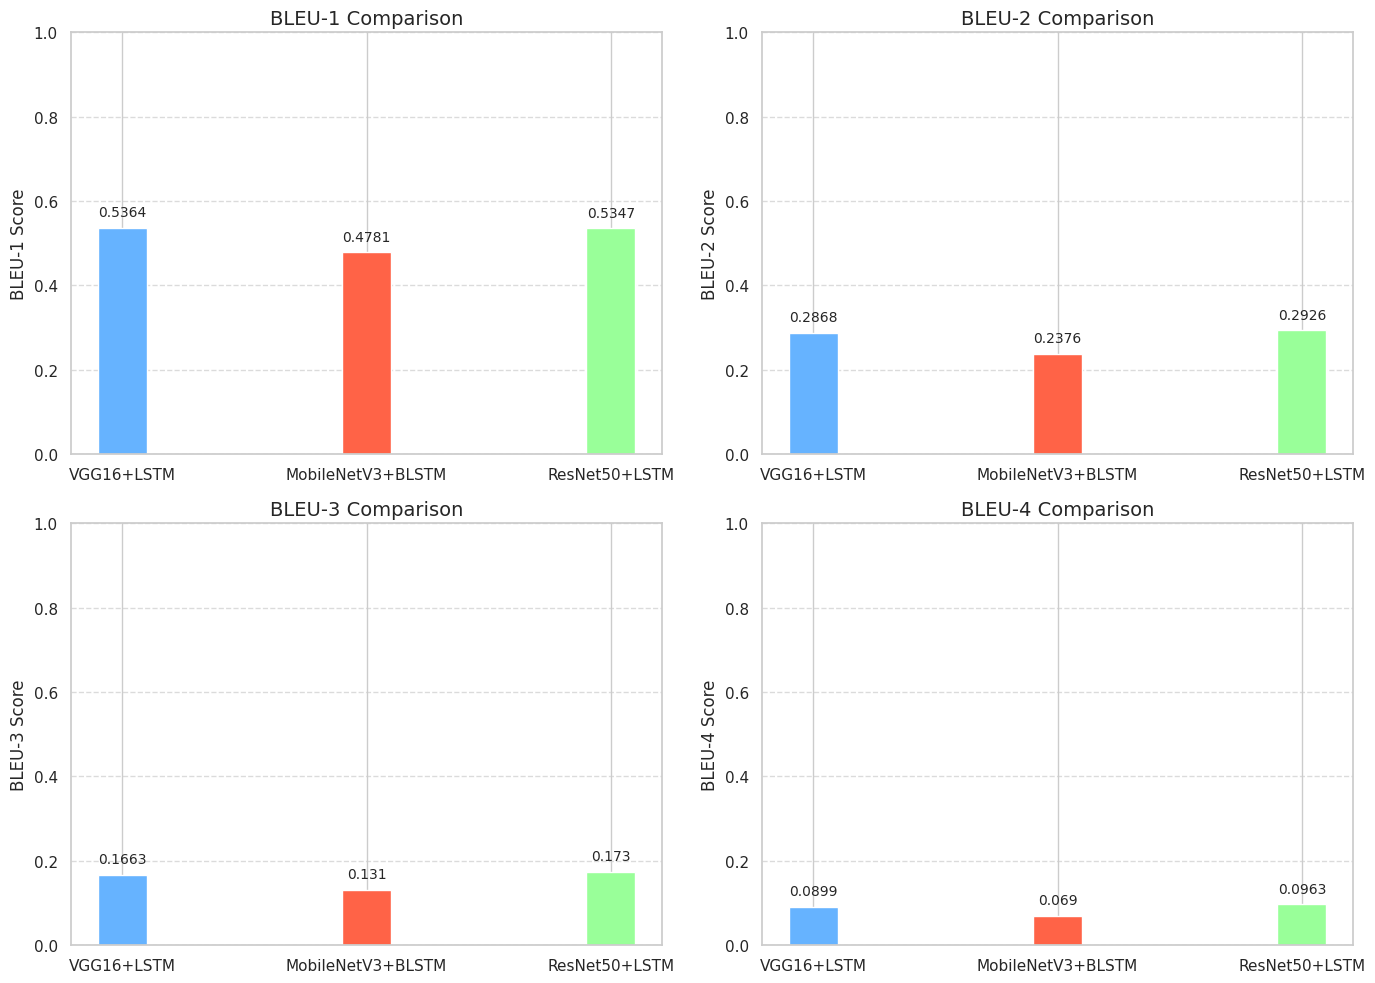

In [19]:


with open('/kaggle/input/mymodelsbleu30k/vgg16_bleu_scoresF.pkl', 'rb') as f:
    vgg_bleu_scores = pickle.load(f)

with open('/kaggle/input/mymodelsbleu30k/mobilenetv3_bleu_scoresf.pkl', 'rb') as f:
    mobilenet_bleu_scores = pickle.load(f)

with open('/kaggle/input/mymodelsbleu30k/resnet50_bleu_scoresf.pkl', 'rb') as f:
    resnet_bleu_scores = pickle.load(f)

print("VGG16 BLEU Scores:", vgg_bleu_scores)
print("MobileNetV3 BLEU Scores:", mobilenet_bleu_scores)
print("ResNet50 BLEU Scores:", resnet_bleu_scores)

models = ['VGG16+LSTM', 'MobileNetV3+BLSTM', 'ResNet50+LSTM']

bleu_1 = [
    vgg_bleu_scores['BLEU-1'],
    mobilenet_bleu_scores['BLEU-1'],
    resnet_bleu_scores['BLEU-1']
]

bleu_2 = [
    vgg_bleu_scores['BLEU-2'],
    mobilenet_bleu_scores['BLEU-2'],
    resnet_bleu_scores['BLEU-2']
]

bleu_3 = [
    vgg_bleu_scores['BLEU-3'],
    mobilenet_bleu_scores['BLEU-3'],
    resnet_bleu_scores['BLEU-3']
]

bleu_4 = [
    vgg_bleu_scores['BLEU-4'],
    mobilenet_bleu_scores['BLEU-4'],
    resnet_bleu_scores['BLEU-4']
]

model_colors = ['#66B3FF', '#FF6347', '#99FF99']  

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

bar_width = 0.2
index = np.arange(len(models))

# BLEU-1 
axes[0, 0].bar(index, bleu_1, bar_width, color=model_colors)
axes[0, 0].set_title('BLEU-1 Comparison', fontsize=14)
axes[0, 0].set_xticks(index)
axes[0, 0].set_xticklabels(models)
axes[0, 0].set_ylabel('BLEU-1 Score')
axes[0, 0].set_ylim([0, 1])
axes[0, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_1):
    axes[0, 0].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

# BLEU-2 
axes[0, 1].bar(index, bleu_2, bar_width, color=model_colors)
axes[0, 1].set_title('BLEU-2 Comparison', fontsize=14)
axes[0, 1].set_xticks(index)
axes[0, 1].set_xticklabels(models)
axes[0, 1].set_ylabel('BLEU-2 Score')
axes[0, 1].set_ylim([0, 1])
axes[0, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_2):
    axes[0, 1].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

# BLEU-3 
axes[1, 0].bar(index, bleu_3, bar_width, color=model_colors)
axes[1, 0].set_title('BLEU-3 Comparison', fontsize=14)
axes[1, 0].set_xticks(index)
axes[1, 0].set_xticklabels(models)
axes[1, 0].set_ylabel('BLEU-3 Score')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_3):
    axes[1, 0].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

# BLEU-4 
axes[1, 1].bar(index, bleu_4, bar_width, color=model_colors)
axes[1, 1].set_title('BLEU-4 Comparison', fontsize=14)
axes[1, 1].set_xticks(index)
axes[1, 1].set_xticklabels(models)
axes[1, 1].set_ylabel('BLEU-4 Score')
axes[1, 1].set_ylim([0, 1])
axes[1, 1].grid(True, axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(bleu_4):
    axes[1, 1].text(i, v + 0.02, round(v, 4), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

avg_bleu_scores = np.mean([bleu_1, bleu_2, bleu_3, bleu_4], axis=0)

best_model_idx = np.argmax(avg_bleu_scores)
best_model = models[best_model_idx]
print(f"\nThe best model based on the average BLEU score is: {best_model} with an average score of {avg_bleu_scores[best_model_idx]:.4f}")

plt.show()
